In [ ]:
! ls

Epl_Prediction	sample_data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Epl_Prediction/England CSV.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12153 non-null  object 
 1   Season         12153 non-null  object 
 2   HomeTeam       12153 non-null  object 
 3   AwayTeam       12153 non-null  object 
 4   FTH Goals      12153 non-null  int64  
 5   FTA Goals      12153 non-null  int64  
 6   FT Result      12153 non-null  object 
 7   HTH Goals      11229 non-null  float64
 8   HTA Goals      11229 non-null  float64
 9   HT Result      11229 non-null  object 
 10  Referee        9329 non-null   object 
 11  H Shots        9329 non-null   float64
 12  A Shots        9329 non-null   float64
 13  H SOT          9329 non-null   float64
 14  A SOT          9329 non-null   float64
 15  H Fouls        9329 non-null   float64
 16  A Fouls        9329 non-null   float64
 17  H Corners      9329 non-null   float64
 18  A Corn

In [ ]:
df.isnull().sum()

,0
Date,0
Season,0
HomeTeam,0
AwayTeam,0
FTH Goals,0
FTA Goals,0
FT Result,0
HTH Goals,924
HTA Goals,924
HT Result,924


In [ ]:
df

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


In [ ]:
# Replacing with Mean for numerical data and Mode for categorical data
df.fillna(df.mean(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# standardize column names
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace(r'\W', '', regex=True)
df.columns

Index(['date', 'season', 'hometeam', 'awayteam', 'fth_goals', 'fta_goals',
       'ft_result', 'hth_goals', 'hta_goals', 'ht_result', 'referee',
       'h_shots', 'a_shots', 'h_sot', 'a_sot', 'h_fouls', 'a_fouls',
       'h_corners', 'a_corners', 'h_yellow', 'a_yellow', 'h_red', 'a_red',
       'display_order', 'league'],
      dtype='object')

In [ ]:
df

,date,season,hometeam,awayteam,fth_goals,fta_goals,ft_result,hth_goals,hta_goals,ht_result,...,h_fouls,a_fouls,h_corners,a_corners,h_yellow,a_yellow,h_red,a_red,display_order,league
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.000000,1.000000,A,...,13.000000,14.000000,1.000000,9.000000,2.000000,2.000000,0.000000,0.000000,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.000000,1.000000,A,...,7.000000,10.000000,4.000000,4.000000,1.000000,3.000000,0.000000,0.000000,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.000000,0.000000,D,...,17.000000,10.000000,8.000000,5.000000,2.000000,1.000000,0.000000,0.000000,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.000000,0.000000,D,...,7.000000,6.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.000000,0.000000,H,...,10.000000,13.000000,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,20250115,Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,Southampton,Everton,0,2,A,0.689554,0.511265,D,...,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,19930814,Premier League
12149,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,0.689554,0.511265,D,...,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,19930814,Premier League
12150,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,0.689554,0.511265,D,...,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,19930814,Premier League
12151,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,0.689554,0.511265,D,...,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,19930814,Premier League


In [ ]:
df.hometeam.value_counts(dropna=False)

,count
hometeam,
Man United,604
Tottenham,604
Everton,603
Arsenal,603
Liverpool,603
Chelsea,603
Newcastle,565
Aston Villa,547
West Ham,547


In [ ]:
df.awayteam.value_counts(dropna=False)

,count
awayteam,
Arsenal,604
Chelsea,604
Tottenham,603
Liverpool,603
Man United,603
Everton,603
Newcastle,566
Aston Villa,546
West Ham,546


In [ ]:
df.ft_result.value_counts(dropna=False)

,count
ft_result,
H,5563
A,3482
D,3108


In [ ]:
df.ht_result.value_counts(dropna=False)

,count
ht_result,
D,5568
H,3939
A,2646


In [ ]:
df.referee.value_counts(dropna=False)

,count
referee,
M Dean,3353
M Atkinson,459
A Marriner,392
M Oliver,390
A Taylor,390
...,...
M. L. Dean,1
Roy Burton,1
Ian Harris,1


In [ ]:
df.league.value_counts(dropna=False)

,count
league,
Premier League,12153


In [ ]:
# Label Encoding hometeam, awayteam, and referee (they are nominal categorical but have too many unique values to do One-hot Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['hometeam'] = le.fit_transform(df['hometeam'])
df['awayteam'] = le.fit_transform(df['awayteam'])
df['referee'] = le.fit_transform(df['referee'])

In [ ]:
# One-hot Encoding ft_result, ht_result, league(They are nominal categorical columns)
df = pd.get_dummies(df, columns=['ft_result', 'ht_result', 'league'], prefix=['ft_result', 'ht_result', 'league'])
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [ ]:
df

,date,season,hometeam,awayteam,fth_goals,fta_goals,hth_goals,hta_goals,referee,h_shots,...,h_red,a_red,display_order,ft_result_A,ft_result_D,ft_result_H,ht_result_A,ht_result_D,ht_result_H,league_Premier League
0,16/01/2025,2024/25,24,11,0,2,0.000000,1.000000,150,5.000000,...,0.000000,0.000000,20250116,1,0,0,1,0,0,1
1,16/01/2025,2024/25,30,41,3,1,0.000000,1.000000,63,23.000000,...,0.000000,0.000000,20250116,0,0,1,1,0,0,1
2,15/01/2025,2024/25,19,1,0,1,0.000000,0.000000,134,10.000000,...,0.000000,0.000000,20250115,1,0,0,0,1,0,1
3,15/01/2025,2024/25,26,17,0,2,0.000000,0.000000,1,21.000000,...,0.000000,0.000000,20250115,1,0,0,0,1,0,1
4,15/01/2025,2024/25,32,52,3,0,1.000000,0.000000,29,17.000000,...,0.000000,0.000000,20250115,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12148,14/08/1993,1993/94,41,19,0,2,0.689554,0.511265,80,13.618716,...,0.062386,0.085968,19930814,1,0,0,0,1,0,1
12149,14/08/1993,1993/94,39,45,3,1,0.689554,0.511265,80,13.618716,...,0.062386,0.085968,19930814,0,0,1,0,1,0,1
12150,14/08/1993,1993/94,27,40,2,0,0.689554,0.511265,80,13.618716,...,0.062386,0.085968,19930814,0,0,1,0,1,0,1
12151,14/08/1993,1993/94,1,37,4,1,0.689554,0.511265,80,13.618716,...,0.062386,0.085968,19930814,0,0,1,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   12153 non-null  object 
 1   season                 12153 non-null  object 
 2   hometeam               12153 non-null  int64  
 3   awayteam               12153 non-null  int64  
 4   fth_goals              12153 non-null  int64  
 5   fta_goals              12153 non-null  int64  
 6   hth_goals              12153 non-null  float64
 7   hta_goals              12153 non-null  float64
 8   referee                12153 non-null  int64  
 9   h_shots                12153 non-null  float64
 10  a_shots                12153 non-null  float64
 11  h_sot                  12153 non-null  float64
 12  a_sot                  12153 non-null  float64
 13  h_fouls                12153 non-null  float64
 14  a_fouls                12153 non-null  float64
 15  h_

In [ ]:
# there is no duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

Duplicate Rows:
 Empty DataFrame
Columns: [date, season, hometeam, awayteam, fth_goals, fta_goals, hth_goals, hta_goals, referee, h_shots, a_shots, h_sot, a_sot, h_fouls, a_fouls, h_corners, a_corners, h_yellow, a_yellow, h_red, a_red, display_order, ft_result_A, ft_result_D, ft_result_H, ht_result_A, ht_result_D, ht_result_H, league_Premier League]
Index: []

[0 rows x 29 columns]


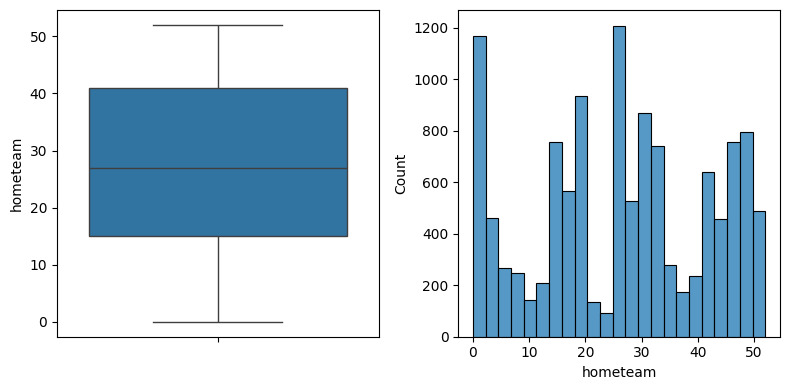

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot(df.hometeam)

plt.subplot(1,2,2)
sns.histplot(df.hometeam)

plt.tight_layout()